In [2]:
import pandas as pd
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')
df_2020 = pd.read_csv('2020.csv')
race_income = pd.read_csv('income_by_race.csv')

C:\Users\alvis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (60,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\alvis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15,60,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\alvis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\alvis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,15,27,28,29,34,35,36,37,38,39,40,41,42,44,45,46,47,48,58,59,64,65,66,67,68,69,70,72,73,74) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj

In [3]:
# Reformatting ID, so they match
df_2015['PID'] = df_2015['PID'].str.rstrip('_')
df_2016['PID'] = df_2016['PID'].str.rstrip('_')
df_2017['PID'] = df_2017['PID'].str.rstrip('_')

In [4]:
# Filtering out irrelevant columns
columns_to_keep_2015 = ['PID', 'PTYPE', 'LU', 'OWNER_MAIL_CS', 'AV_TOTAL']
columns_to_keep = ['PID', 'PTYPE', 'LU', 'MAIL CS', 'AV_TOTAL']
df_2015_filtered = df_2015.loc[:, columns_to_keep_2015]
df_2016_filtered = df_2016.loc[:, columns_to_keep]
df_2017_filtered = df_2017.loc[:, columns_to_keep]
df_2018_filtered = df_2018.loc[:, columns_to_keep]
df_2019_filtered = df_2019.loc[:, columns_to_keep]
df_2020_filtered = df_2020.loc[:, columns_to_keep]


In [5]:
# Reformatting the city column so they are all consistent 
df_2015_filtered['OWNER_MAIL_CS'] = df_2015_filtered['OWNER_MAIL_CS'].str.replace(' ', '')
df_2016_filtered['MAIL CS'] = df_2016_filtered['MAIL CS'].str.replace(' ', '')
df_2017_filtered['MAIL CS'] = df_2017_filtered['MAIL CS'].str.replace(' ', '')
df_2018_filtered['MAIL CS'] = df_2018_filtered['MAIL CS'].str.replace(' ', '')
df_2019_filtered['MAIL CS'] = df_2019_filtered['MAIL CS'].str.replace(' ', '')
df_2020_filtered['MAIL CS'] = df_2020_filtered['MAIL CS'].str.replace(' ', '')

In [6]:
def avg_price_2015(df, location):
    prices = df[df['OWNER_MAIL_CS'] == location]
    average_price = prices['AV_TOTAL'].median()
    return average_price

def avg_price(df, location):
    prices = df[df['MAIL CS'] == location]
    average_price = prices['AV_TOTAL'].median()
    return average_price

def avg_prices_by_location(df_list, location):
    avg_prices = {}
    for i, df in enumerate(df_list, start=2016):
        avg_prices[i] = avg_price(df, location)
    return avg_prices

df_list = [df_2016_filtered, df_2017_filtered, df_2018_filtered, df_2019_filtered, df_2020_filtered]

# Dorchester
dorchester15 = avg_price_2015(df_2015_filtered, 'DORCHESTERMA')
dorchester_avg_prices = avg_prices_by_location(df_list, 'DORCHESTERMA')

# Mattapan
MATTAPAN15 = avg_price_2015(df_2015_filtered, 'MATTAPANMA')
MATTAPAN_avg_prices = avg_prices_by_location(df_list, 'MATTAPANMA')

# Roxbury
ROXBURY15 = avg_price_2015(df_2015_filtered, 'ROXBURYMA')
ROXBURY_avg_prices = avg_prices_by_location(df_list, 'ROXBURYMA')

# Boston
BOSTON15 = avg_price_2015(df_2015_filtered, 'BOSTONMA')
BOSTON_avg_prices = avg_prices_by_location(df_list, 'BOSTONMA')

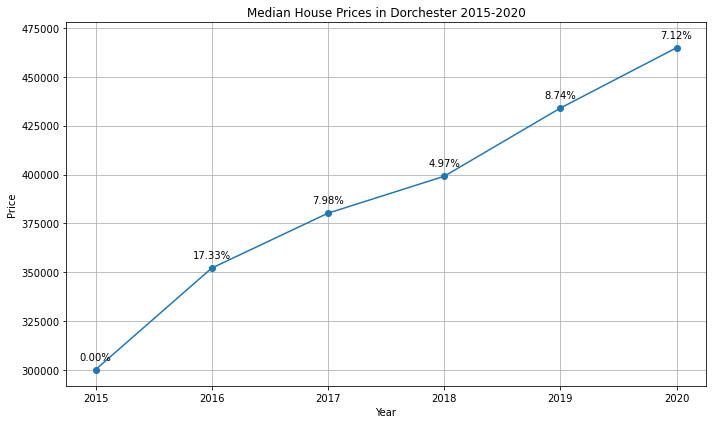

In [7]:
# Dorchester Graph
import matplotlib.pyplot as plt

years = [2015] + list(dorchester_avg_prices.keys())
prices = [dorchester15] + list(dorchester_avg_prices.values())
percent_changes = [0]  

for i in range(1, len(prices)):
    percent_change = ((prices[i] - prices[i-1]) / prices[i-1]) * 100
    percent_changes.append(percent_change)

plt.figure(figsize=(10, 6))
plt.plot(years, prices, marker='o', linestyle='-', label='Median Price')
for i in range(len(years)):
    plt.annotate(f'{percent_changes[i]:.2f}%', (years[i], prices[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Median House Prices in Dorchester 2015-2020')
plt.grid(True)
plt.ylim(top=plt.ylim()[1]*1.01)
plt.tight_layout()
plt.show()

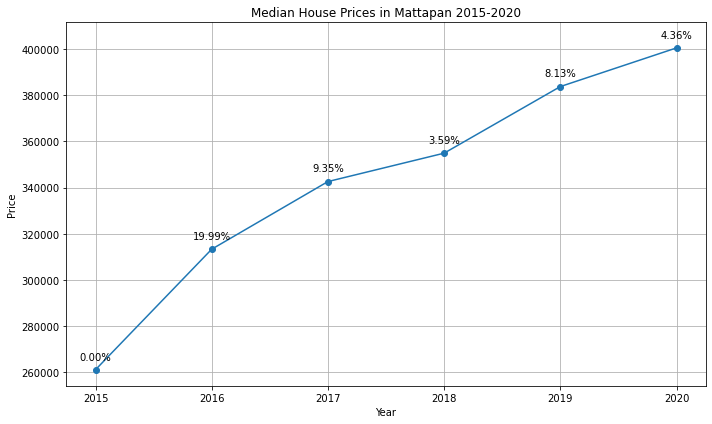

In [8]:
# Mattapan Graph
import matplotlib.pyplot as plt

years = [2015] + list(MATTAPAN_avg_prices.keys())
prices = [MATTAPAN15] + list(MATTAPAN_avg_prices.values())
percent_changes = [0]  

for i in range(1, len(prices)):
    percent_change = ((prices[i] - prices[i-1]) / prices[i-1]) * 100
    percent_changes.append(percent_change)

plt.figure(figsize=(10, 6))
plt.plot(years, prices, marker='o', linestyle='-', label='Median Price')
for i in range(len(years)):
    plt.annotate(f'{percent_changes[i]:.2f}%', (years[i], prices[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Median House Prices in Mattapan 2015-2020')
plt.grid(True)
plt.ylim(top=plt.ylim()[1]*1.01)
plt.tight_layout()
plt.show()

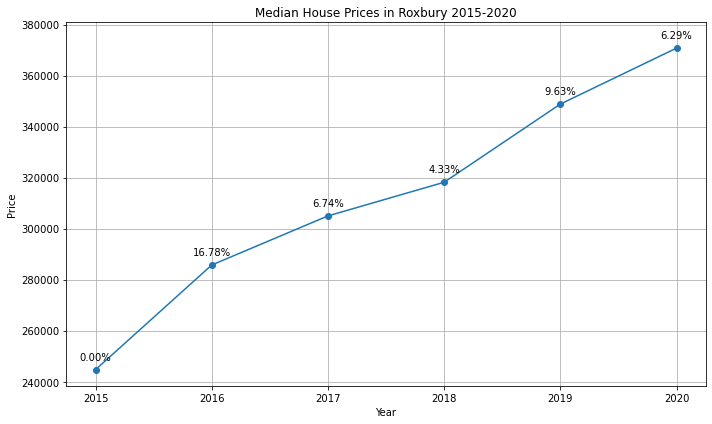

In [9]:
# Roxbury Graph
import matplotlib.pyplot as plt

years = [2015] + list(ROXBURY_avg_prices.keys())
prices = [ROXBURY15] + list(ROXBURY_avg_prices.values())
percent_changes = [0]  

for i in range(1, len(prices)):
    percent_change = ((prices[i] - prices[i-1]) / prices[i-1]) * 100
    percent_changes.append(percent_change)

plt.figure(figsize=(10, 6))
plt.plot(years, prices, marker='o', linestyle='-', label='Median Price')
for i in range(len(years)):
    plt.annotate(f'{percent_changes[i]:.2f}%', (years[i], prices[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Median House Prices in Roxbury 2015-2020')
plt.grid(True)
plt.ylim(top=plt.ylim()[1]*1.01)
plt.tight_layout()
plt.show()

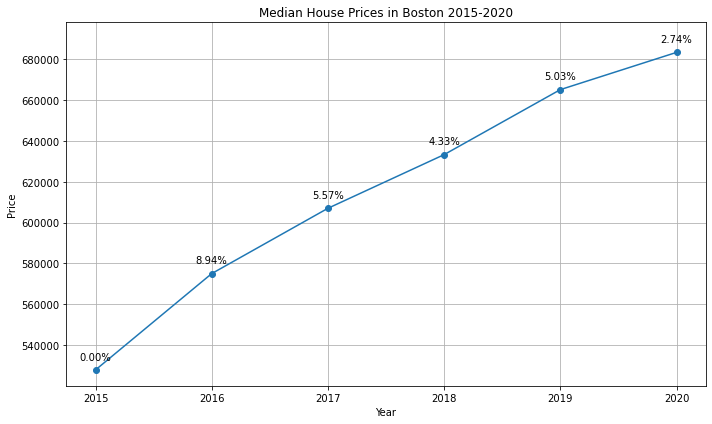

In [10]:
# Boston Graph 
import matplotlib.pyplot as plt

years = [2015] + list(BOSTON_avg_prices.keys())
prices = [BOSTON15] + list(BOSTON_avg_prices.values())
percent_changes = [0]  

for i in range(1, len(prices)):
    percent_change = ((prices[i] - prices[i-1]) / prices[i-1]) * 100
    percent_changes.append(percent_change)

plt.figure(figsize=(10, 6))
plt.plot(years, prices, marker='o', linestyle='-', label='Median Price')
for i in range(len(years)):
    plt.annotate(f'{percent_changes[i]:.2f}%', (years[i], prices[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Median House Prices in Boston 2015-2020')
plt.grid(True)
plt.ylim(top=plt.ylim()[1]*1.01)
plt.tight_layout()
plt.show()

In [11]:
race_income.head()

seq_id  muni_id   municipal              geoid  logrecno acs_year  \
0    4488       19        Ayer  06000US2501703005       211  2016-20   
1    4489       20  Barnstable  06000US2500103690        28  2016-20   
2    4490       21       Barre  06000US2502703740       327  2016-20   
3    4491       22      Becket  06000US2500304545        45  2016-20   
4    4492       23     Bedford  06000US2501704615       212  2016-20   

        mhi   mhi_me   whi_mhi  whi_mhi_me  ...  pi_mhi  pi_mhi_me  oth_mhi  \
0   99044.0  10636.0   98264.0     14741.0  ...       0          0      0.0   
1   77227.0   6060.0   79915.0      6772.0  ...       0          0  80833.0   
2   81109.0  16578.0   82339.0     21583.0  ...       0          0      0.0   
3   59922.0  20150.0   59018.0     21487.0  ...       0          0      0.0   
4  133824.0  13847.0  133368.0     14525.0  ...       0          0      0.0   

   oth_mhi_me   mlt_mhi  mlt_mhi_me   nhw_mhi  nhw_mhi_me   lat_mhi  \
0         0.0       0.0         0.0   97917.0     16393.0  105288.0   
1     28257.0  150694.0    118469.0   80545.0      6550.0       0.0   
2         0.0       0.0         0.0   82339.0     21583.0       0.0   
3         0.0       0.0         0.0   58661.0     21081.0       0.0   
4         0.0       0.0         0.0  133147.0     14634.0  250001.0   

   lat_mhi_me  
0     73005.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 26 columns]

In [12]:
columns_to_keep = ['municipal','whi_mhi','aa_mhi','as_mhi','lat_mhi']
race_income_filtered = race_income.loc[:, columns_to_keep]

In [13]:
race_income_filtered.head()
df = race_income_filtered

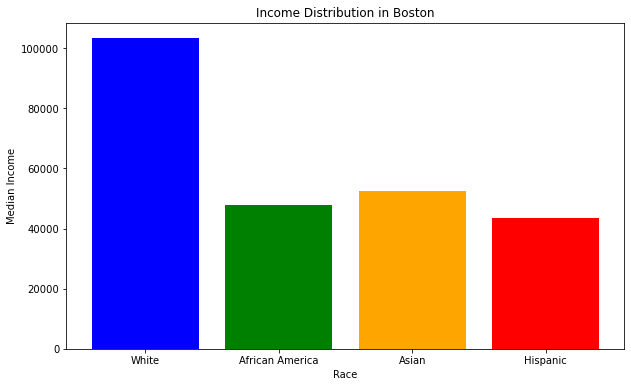

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

boston_row = df[df['municipal'] == 'Boston']
boston_values = boston_row[['whi_mhi', 'aa_mhi', 'as_mhi', 'lat_mhi']].values.flatten()
column_names = ['White', 'African America', 'Asian', 'Hispanic']
plt.figure(figsize=(10, 6))
plt.bar(column_names, boston_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Race')
plt.ylabel('Median Income')
plt.title('Income Distribution in Boston')
plt.show()